In [9]:
# import libraries
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.optimizers import Adam


import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [10]:
from sklearn.model_selection import train_test_split

In [12]:
# importing dataset
df3 = pd.read_excel("./dataset/site3.xlsx")

In [13]:
# check the length of each dataset
len(df3)
# len(df2)
# len(df3)

70176

In [14]:
# Check Columns
df3.columns

Index(['Time(year-month-day h:m:s)', 'Wind speed at height of 10 meters (m/s)',
       'Wind direction at height of 10 meters (˚)',
       'Wind speed at height of 30 meters (m/s)',
       'Wind direction at height of 30 meters (˚)',
       'Wind speed at height of 50 meters (m/s)',
       'Wind direction at height of 50 meters (˚)',
       'Wind speed - at the height of wheel hub (m/s)',
       'Wind speed - at the height of wheel hub (˚)', 'Air temperature  (°C) ',
       'Atmosphere (hpa)', 'Relative humidity (%)', 'Power (MW)'],
      dtype='object')

In [15]:
# Rename Columns
df3 = df3.rename(columns={
    'Time(year-month-day h:m:s)': 'Timestamp',
    'Wind speed at height of 10 meters (m/s)': 'WS_10',
    'Wind direction at height of 10 meters (˚)': 'WD_10',
    'Wind speed at height of 30 meters (m/s)': 'WS_30',
    'Wind direction at height of 30 meters (˚)': 'WD_30',
    'Wind speed at height of 50 meters (m/s)': 'WS_50',
    'Wind direction at height of 50 meters (˚)': 'WD_50',
    'Wind speed - at the height of wheel hub (m/s)': 'WS_hub',
    'Wind speed - at the height of wheel hub (˚)': 'WD_hub',
    'Air temperature  (°C) ': 'Air_T',
    'Atmosphere (hpa)': 'Air_P',
    'Relative humidity (%)': 'Air_H',
    'Power (MW)': 'Power'
})

In [16]:
# Check datatypes
df3.dtypes

Timestamp    datetime64[ns]
WS_10               float64
WD_10               float64
WS_30               float64
WD_30               float64
WS_50               float64
WD_50               float64
WS_hub              float64
WD_hub              float64
Air_T               float64
Air_P               float64
Air_H               float64
Power               float64
dtype: object

In [17]:
df3['Timestamp'] = pd.to_datetime(df3['Timestamp'])

In [18]:
df3.set_index('Timestamp', inplace=True)

In [19]:
#print top values
df3.head()
# Frequency - 15 Seconds

,WS_10,WD_10,WS_30,WD_30,WS_50,WD_50,WS_hub,WD_hub,Air_T,Air_P,Air_H,Power
Timestamp,,,,,,,,,,,,
2019-01-01 00:00:00,2.32218,317.431,2.59042,312.468,1.62735,351.117,2.34887,313.33,26.46,984.37,31.7949,-0.365790
2019-01-01 00:15:00,2.32218,317.431,2.59042,312.468,1.62735,351.117,2.34887,313.33,26.46,984.37,31.7949,-0.376874
2019-01-01 00:30:00,2.32218,317.431,2.59042,312.468,1.62735,351.117,2.34887,313.33,26.46,984.37,31.7949,-0.387959
2019-01-01 00:45:00,2.32218,317.431,2.59042,312.468,1.62735,351.117,2.34887,313.33,26.46,984.37,31.7949,-0.395348
2019-01-01 01:00:00,2.32218,317.431,2.59042,312.468,1.62735,351.117,2.34887,313.33,26.46,984.37,31.7949,-0.384264


In [20]:
# bottom values
df3.tail()

,WS_10,WD_10,WS_30,WD_30,WS_50,WD_50,WS_hub,WD_hub,Air_T,Air_P,Air_H,Power
Timestamp,,,,,,,,,,,,
2020-12-31 22:45:00,8.62,159.0,9.04,172.4,9.6728,162.401,9.61,167.3,-5.476,977.088,42.4833,57.9832
2020-12-31 23:00:00,8.88,163.9,8.99,180.2,9.6193,169.748,8.93,171.2,-5.197,976.939,42.6886,58.7000
2020-12-31 23:15:00,9.77,160.6,9.78,173.6,10.4646,163.531,9.69,168.2,-5.084,976.790,43.5779,63.1782
2020-12-31 23:30:00,8.93,162.1,8.92,173.8,9.5444,163.720,9.22,169.5,-5.184,976.641,44.0568,59.0399
2020-12-31 23:45:00,8.67,159.8,9.48,174.5,10.1436,164.379,10.11,167.0,-5.178,976.641,44.6725,61.6817


In [21]:
# Check Min and Max
print("Timestamp")
print(df3.index.min());
print(df3.index.max());

print("")
print("Wind Speed - 10")
print(df3['WS_10'].min());
print(df3['WS_10'].max());

print("")
print("Wind Direction - 10")
print(df3['WD_10'].min());
print(df3['WD_10'].max());

print("")
print("Wind Speed - 30")
print(df3['WS_30'].min());
print(df3['WS_30'].max());

print("")
print("Wind Direction - 30")
print(df3['WD_30'].min());
print(df3['WD_30'].max());

print("")
print("Wind Speed - 50")
print(df3['WS_50'].min());
print(df3['WS_50'].max());

print("")
print("Wind Direction - 50")
print(df3['WD_50'].min());
print(df3['WD_50'].max());

print("")
print("Wind Speed - hub")
print(df3['WS_hub'].min());
print(df3['WS_hub'].max());

print("")
print("Wind Direction - hub")
print(df3['WD_hub'].min());
print(df3['WD_hub'].max());

print("")
print("Air - Temperature")
print(df3['Air_T'].min());
print(df3['Air_T'].max());

print("")
print("Air - Pressure")
print(df3['Air_P'].min());
print(df3['Air_P'].max());

print("")
print("Relative Humidity")
print(df3['Air_H'].min());
print(df3['Air_H'].max());

print("")
print("Power")
print(df3['Power'].min());
print(df3['Power'].max());

Timestamp
2019-01-01 00:00:00
2020-12-31 23:45:00

Wind Speed - 10
0.0
27.926

Wind Direction - 10
0.0
360.0

Wind Speed - 30
0.0
22.0917

Wind Direction - 30
0.00287437
360.0

Wind Speed - 50
0.0
21.836

Wind Direction - 50
0.0
360.0

Wind Speed - hub
0.0
36.9203

Wind Direction - hub
0.0
360.0

Air - Temperature
-14.27
36.32

Air - Pressure
950.958
990.731

Relative Humidity
3.43656
100.0

Power
-0.668767
94.2666


In [22]:
# convert datetime object
# df3['Timestamp'] = pd.to_datetime(df3['Timestamp'])
df3.dtypes

WS_10     float64
WD_10     float64
WS_30     float64
WD_30     float64
WS_50     float64
WD_50     float64
WS_hub    float64
WD_hub    float64
Air_T     float64
Air_P     float64
Air_H     float64
Power     float64
dtype: object

In [23]:
# check for null values
df3.isnull().mean()

WS_10     0.0
WD_10     0.0
WS_30     0.0
WD_30     0.0
WS_50     0.0
WD_50     0.0
WS_hub    0.0
WD_hub    0.0
Air_T     0.0
Air_P     0.0
Air_H     0.0
Power     0.0
dtype: float64

In [24]:
# Describe the data
df3.describe()

,WS_10,WD_10,WS_30,WD_30,WS_50,WD_50,WS_hub,WD_hub,Air_T,Air_P,Air_H,Power
count,70176.000000,70176.000000,70176.000000,70176.000000,70176.000000,70176.000000,70176.000000,70176.000000,70176.000000,70176.000000,70176.000000,70176.000000
mean,3.589179,148.329229,5.381621,145.127802,4.932602,143.019034,4.038722,179.948513,17.511213,971.787024,58.809449,18.167233
std,3.342172,97.895041,2.956940,88.322158,3.240955,93.320926,3.299241,110.122651,9.838062,6.853991,23.501034,22.632437
min,0.000000,0.000000,0.000000,0.002874,0.000000,0.000000,0.000000,0.000000,-14.270000,950.958000,3.436560,-0.668767
25%,0.000000,82.300000,3.180000,59.526000,2.661000,56.995150,1.127000,119.000000,10.470000,966.243000,39.736650,0.642903
50%,3.158670,148.338000,4.957000,162.332000,4.573000,149.560500,3.855000,165.647000,20.500000,971.877000,57.142850,8.394690
75%,5.712000,182.700000,7.102500,198.838750,6.915000,180.958000,5.984670,290.410500,26.460000,976.935000,77.371400,27.951500
max,27.926000,360.000000,22.091700,360.000000,21.836000,360.000000,36.920300,360.000000,36.320000,990.731000,100.000000,94.266600


(array([17571.,  4703.,  3454.,  3045.,  2442.,  2142.,  1951.,  1809.,
         1695.,  1573.,  1358.,  1375.,  1233.,  1163.,  1136.,  1057.,
          997.,   960.,   868.,   823.,   758.,   728.,   653.,   670.,
          686.,   653.,   597.,   618.,   536.,   547.,   532.,   529.,
          473.,   469.,   448.,   413.,   425.,   396.,   391.,   391.,
          402.,   381.,   353.,   330.,   355.,   299.,   316.,   315.,
          274.,   300.,   274.,   307.,   329.,   286.,   261.,   287.,
          280.,   271.,   255.,   255.,   248.,   238.,   202.,   191.,
          154.,   160.,   151.,   132.,   120.,    92.,    57.,    33.]),
 array([-0.668767  ,  0.64977976,  1.96832653,  3.28687329,  4.60542006,
         5.92396682,  7.24251358,  8.56106035,  9.87960711, 11.19815387,
        12.51670064, 13.8352474 , 15.15379417, 16.47234093, 17.79088769,
        19.10943446, 20.42798122, 21.74652799, 23.06507475, 24.38362151,
        25.70216828, 27.02071504, 28.33926181, 29.65780857

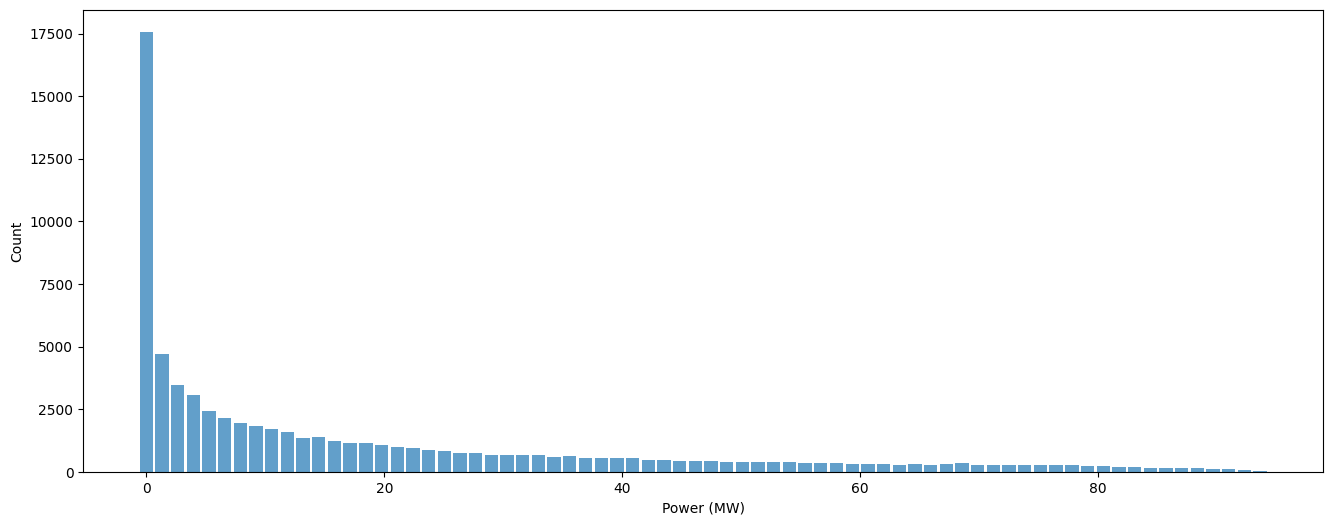

In [25]:
# plot histogram
plt.figure(figsize=(16,6))
plt.xlabel("Power (MW)")
plt.ylabel("Count")

plt.hist(
    x=df3['Power'], bins='auto',
    alpha=0.7, rwidth=0.85
)

array([<Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>], dtype=object)

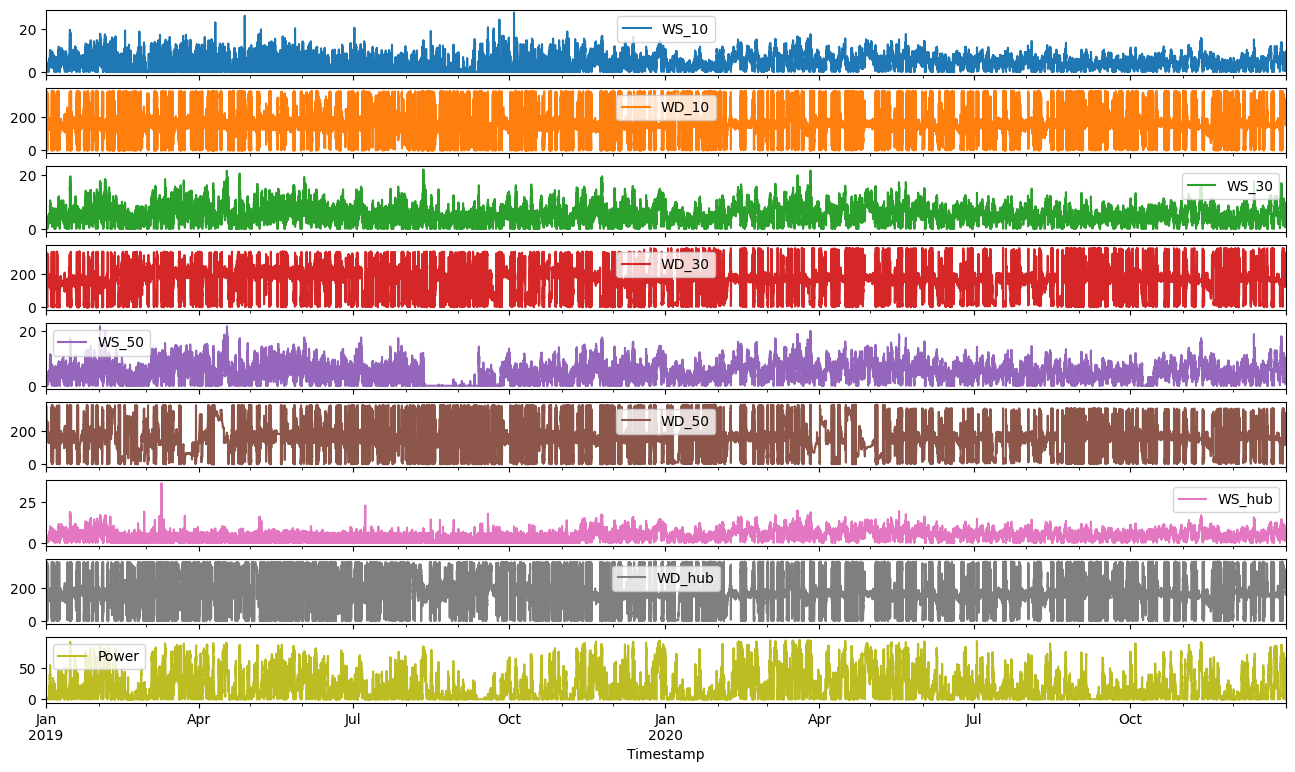

In [26]:
# Line plot
df3[['WS_10','WD_10','WS_30','WD_30','WS_50','WD_50','WS_hub','WD_hub','Power']].plot(subplots=True, figsize=(16, 9))

array([<Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>],
      dtype=object)

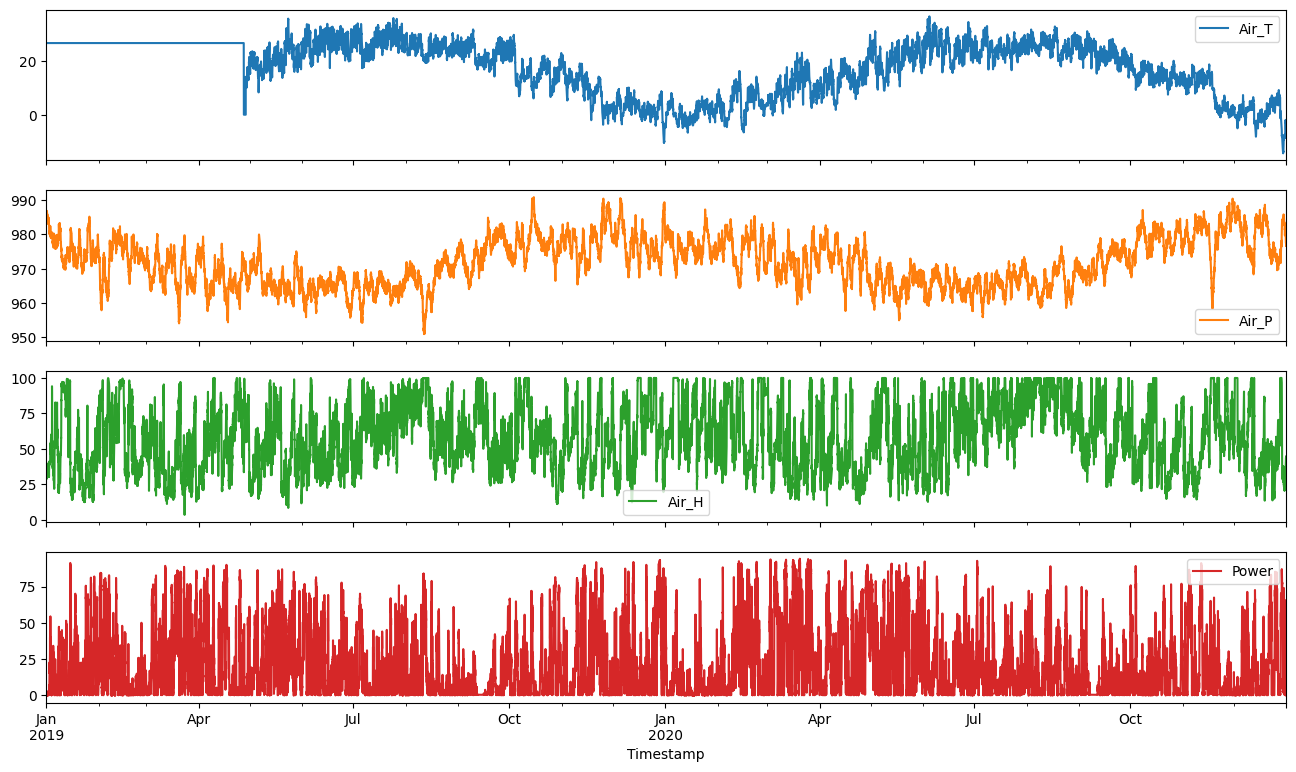

In [27]:
df3[['Air_T','Air_P','Air_H','Power']].plot(subplots=True, figsize=(16, 9))

<Axes: >

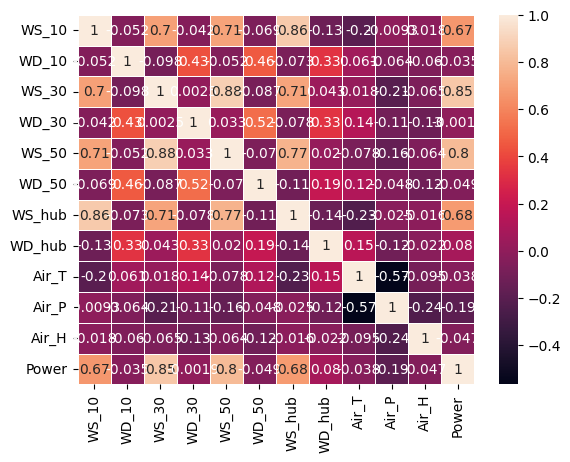

In [28]:
heatmap_df = df3
sns.heatmap(heatmap_df.corr(), annot=True, linewidth=.5)

In [29]:
FEATURES_TO_USE = ['WS_10', 'WS_30', 'WS_50', 'WS_hub']

In [30]:
df3_final = df3[FEATURES_TO_USE]
df3_output = df3[['Power']]

In [31]:
df3_final.head()

,WS_10,WS_30,WS_50,WS_hub
Timestamp,,,,
2019-01-01 00:00:00,2.32218,2.59042,1.62735,2.34887
2019-01-01 00:15:00,2.32218,2.59042,1.62735,2.34887
2019-01-01 00:30:00,2.32218,2.59042,1.62735,2.34887
2019-01-01 00:45:00,2.32218,2.59042,1.62735,2.34887
2019-01-01 01:00:00,2.32218,2.59042,1.62735,2.34887


In [32]:
df3_final.dtypes

WS_10     float64
WS_30     float64
WS_50     float64
WS_hub    float64
dtype: object

In [34]:
# Seasonality
decomposition = seasonal_decompose(df3_output, model='additive', period=365)

In [35]:
# Trend & Seasonality

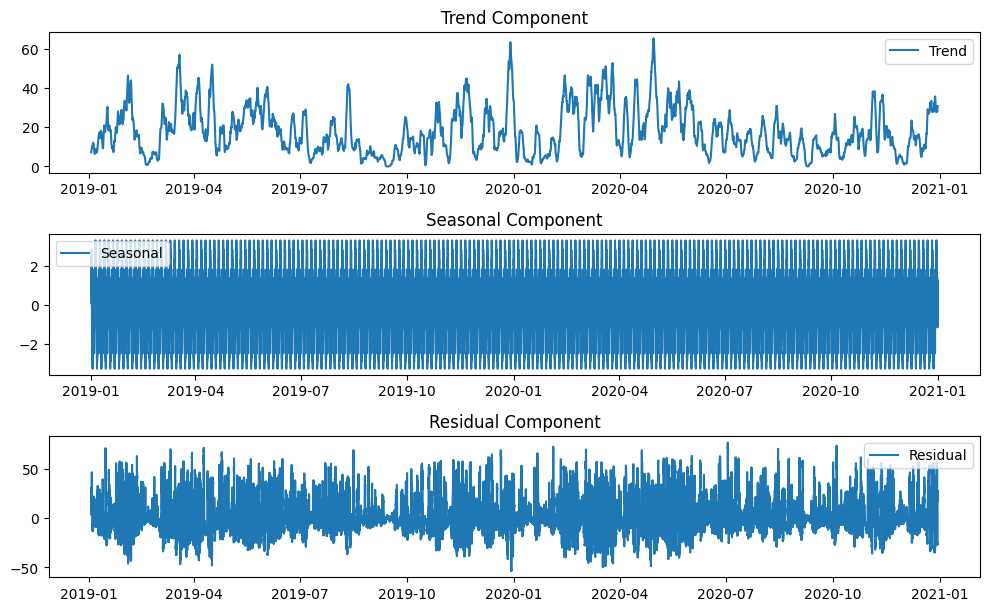

In [36]:
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(decomposition.trend, label='Trend')
plt.title('Trend Component')
plt.legend()
plt.subplot(412)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.title('Seasonal Component')
plt.legend()
plt.subplot(413)
plt.plot(decomposition.resid, label='Residual')
plt.title('Residual Component')
plt.legend()
plt.tight_layout()
plt.show()

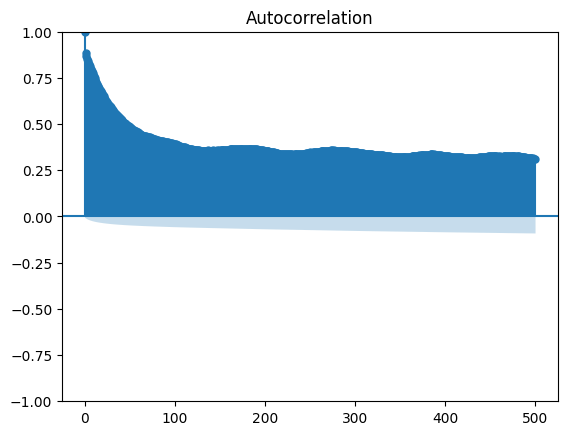

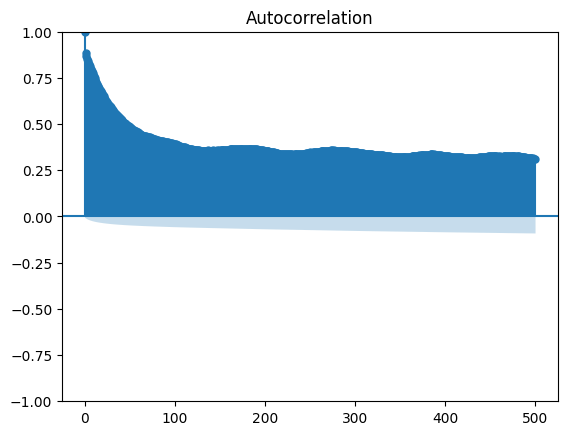

In [37]:
plot_acf(df3['WS_hub'], lags=500)

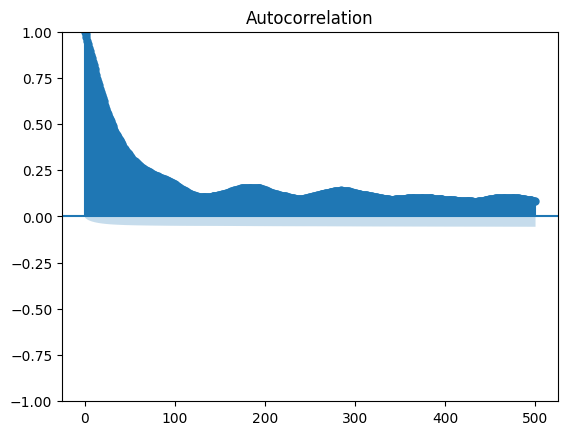

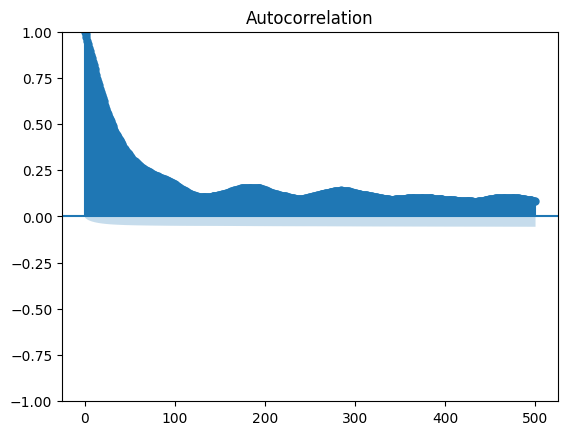

In [38]:
plot_acf(df3_output, lags=500)

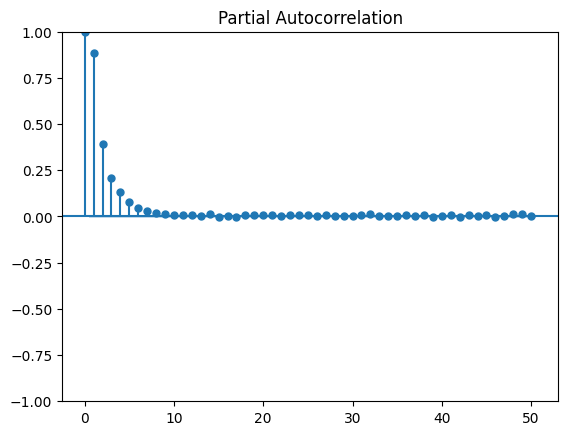

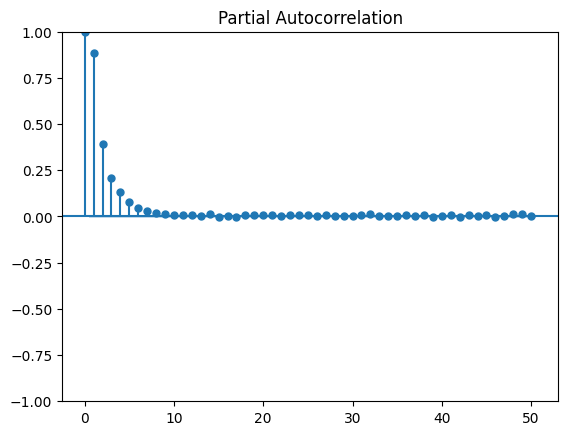

In [39]:
plot_pacf(df3['WS_hub'], lags=50)

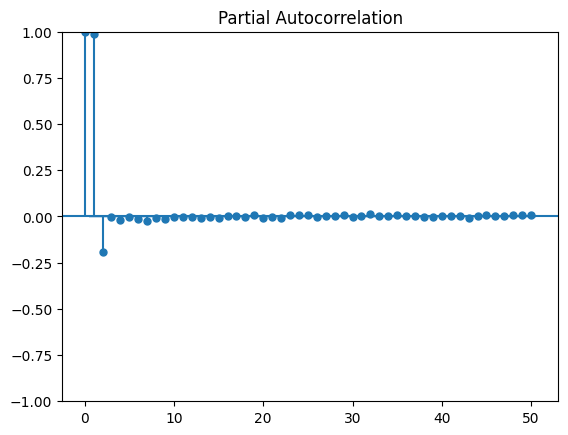

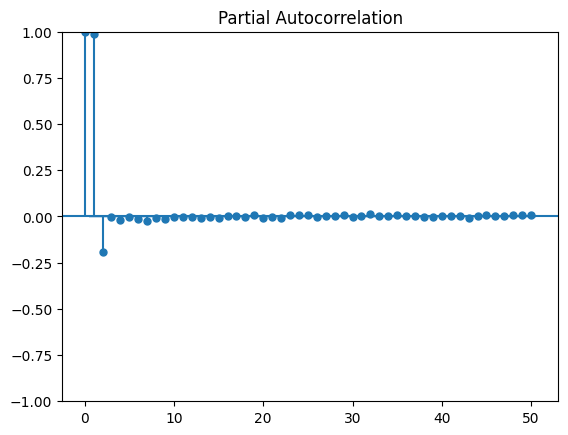

In [40]:
plot_pacf(df3_output, lags=50)